# Lab2: Lucrul cu datele

### Citire date
Vom folosi Pandas pentru a gestiona seturile de date

In [44]:
import pandas as pd

Vom crea un data frame folosind functia ```read_csv()```.
<br>
Parametri importanti:
<ul>
    <li> <code>filepath_or_buffer</code>: specifica calea spre dataset.</li>
    <li> <code>index_col</code>: specifica care coloana sa fie tratata ca index in data frame (util cand avem un ID in dataset).</li>
    <li> <code>na_values</code>: specifica valorile (sau celulele) care sa fie ignorate cand se incarca data frame-ul in memorie. Asta poate optimiza procesul de Data Curation.</li>
</ul>

In [ ]:
# df = pd.read_csv(
#     filepath_or_buffer="./car_price_dataset.csv",
#     index_col='ID',
#     na_values='?'
# )
df = pd.read_csv("../datasets/gameandgrade.csv")

#primele 5
df.head()

#primele 5
# df.tail()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


### Explorare date

Putem vedea informatii despre un dataset folosind functia ```info()```. Aceasta ne va insira caracteristicile (sau atributele/variabilele independente) dar si variabila dependenta.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB


Putem explora fiecare atribut, pentru a vedea cantitatile si frecventa valorilor continute. Astfel, obiectul data frame contine ca si atribute interne, atributele din setul de date (numele coloanelor). Acestea sunt la randul lor obiecte care ofera metoda ```value_counts()```. Aceasta returneaza un dictionar cu valoarea din coloana respectiva si numarul de aparitii al acesteia.

In [49]:
df["Playing Often"].value_counts()

Playing Often
0    227
5    156
1    115
3    112
4     88
2     72
Name: count, dtype: int64

Putem analiza si forma setului de date, prin atributul ```shape```. Acesta este o tupla care contine numarul de linii si numaurl de coloane.

In [50]:
df.shape

(770, 10)

Pentru a analiza date statistice, minim, maxim, valori medii, putem folosi metoda ```describe()```.

In [51]:
df.describe()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.498701,4.944156,1.584416,2.242857,1.488312,0.706494,1.837662,3.718182,3.410390
std,0.500323,2.999913,1.407306,1.923635,1.337853,0.458509,1.064077,1.171756,1.176447
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.250000
50%,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,2.000000,5.000000,4.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000


### Vizualizare date
Pentru a intelege setul de date, este util vizualizarea lor grafica. Pentru aceasta vom folosi modului ```matplotlib``` si submodulul ```pyplot```.

In [52]:
import matplotlib.pyplot as plt

Pentru generarea unei histograme asupra unei singure variabile, putem folosi metoda ```hist()```.

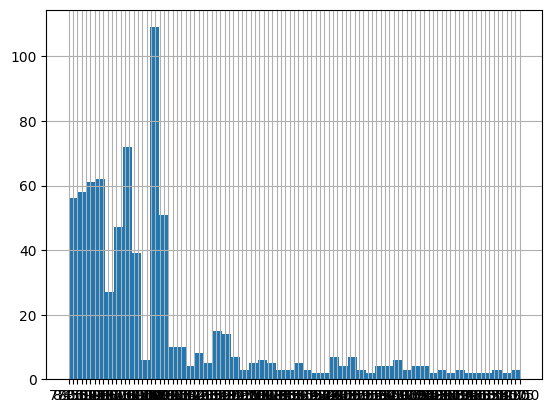

In [55]:
df['Grade'].hist(bins=50)
plt.show()

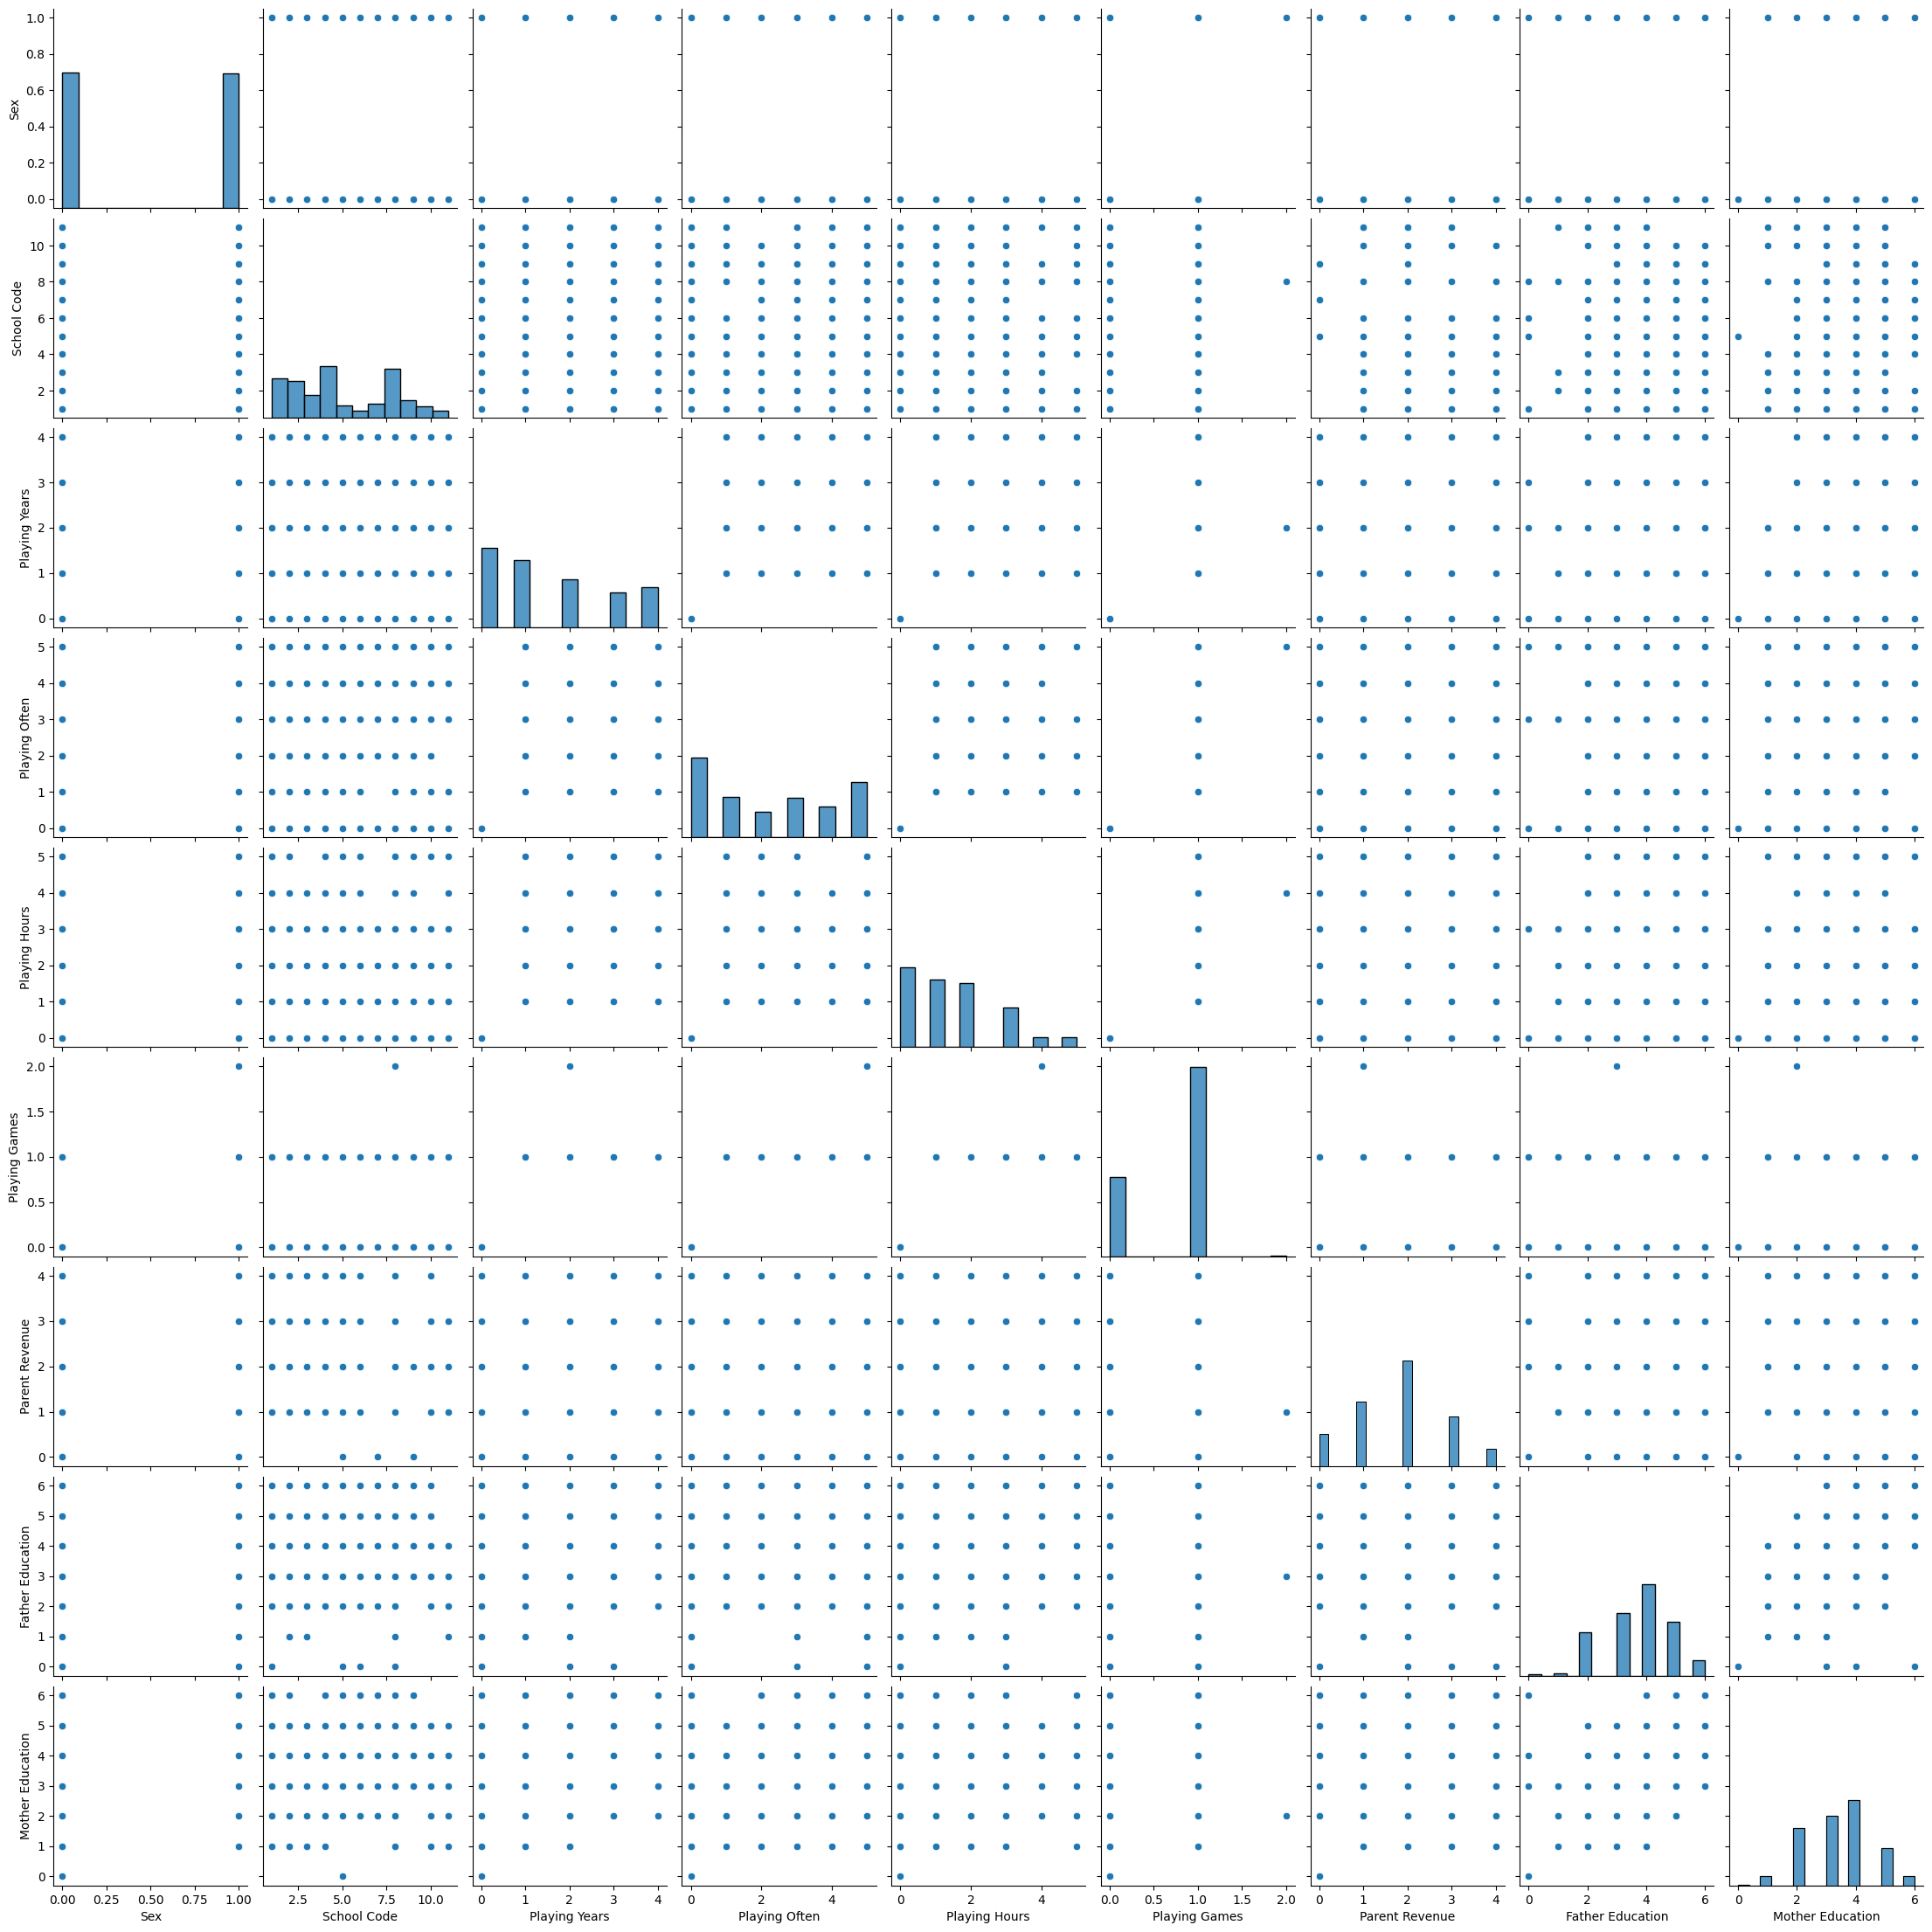

In [56]:
import seaborn as sns

tips = sns.pairplot(df)
plt.show()


In [68]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df["Grade"].str.replace("..", ".").astype(float)
X = df.drop(columns=["Grade", "Father Education", "Mother Education"])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

MSE = lr.score(X_test, y_test)
print(f"{(1 - MSE) * 100}%")

print(f"MSE = {MSE}")
print(lr.coef_)

83.44409360169792%
MSE = 0.1655590639830209
[ -2.90658076   1.10840137   1.49303589   2.26498103  -0.55872236
 -12.18198426   0.33093105]
